# Traffic Sign Recognition Neural Network

1. Introduction
    This project involves building a convulutional neural network to recognize traffice signs. The dataset is taken from a machine learning competition held at the International Joint Conference on Neural Networks in 2011 (https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign). This dataset consists of 39209 traffic sign images such as the picture below. We will work with this dataset to create train/test splits.

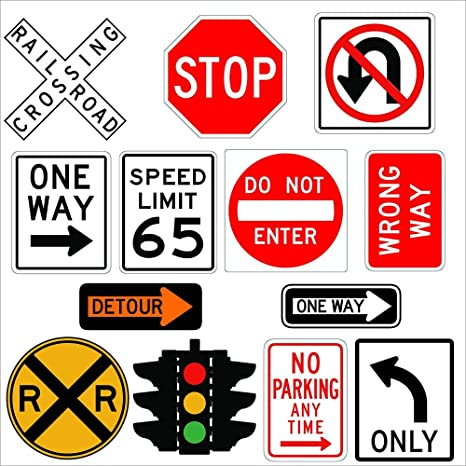

2. The objective is to correctly recognize the right traffice sign images. CNN no doubtly comes as first choice.

Importing standard machine learning libraries learnt from the course

In [4]:
import numpy as np                               
import pandas as pd                        
import matplotlib.pyplot as plt                             
import tensorflow as tf                          
from PIL import Image
import os                                        
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical          
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tqdm                                    
import warnings

There are 43 traffic signs. We are also going to resize image to (30,30) same as our example in the class on IRIS data.

In [24]:
data = []
labels = []
classes = 43

for i in range(classes):
    path = os.path.join(os.getcwd(),'train',str(i))
    images = os.listdir(path)
    
    for j in images:
        try:
            image = Image.open(path + '\\'+ j)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            temp_list = [0]*43
            temp_list[i] = 1
            labels.append(temp_list)
        except:
            print("Error loading image")
#Converting lists into numpy arrays bcoz its faster and takes lesser #memory
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209, 43)


Splitting data 80-20 as test-train

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=68)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367, 43) (7842, 43)


Building a CNN  with 2 convultional neural nets, max poolings, 25% dropout of the neurons then flattening data into 1D and eventually output it into dense layer with 43 labels.

In [26]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 64)         

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
981/981 [==============================] - 32s 32ms/step - loss: 0.6327 - accuracy: 0.8181 - val_loss: 0.1385 - val_accuracy: 0.9624
Epoch 2/2
981/981 [==============================] - 30s 31ms/step - loss: 0.3504 - accuracy: 0.8997 - val_loss: 0.0861 - val_accuracy: 0.9769


Plotting the accuracy and losses

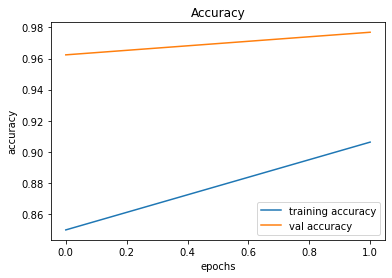

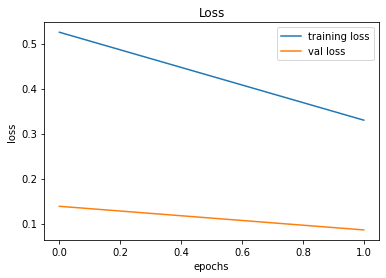

In [29]:
model.save("Trafic_signs_model.h5")
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
#plotting graphs for loss 
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Put it into test and we can see we achieved a 94.4% accuracy.

In [30]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)
#Accuracy with the test data
print(accuracy_score(labels, pred))

X:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9441805225653207


Conclusion: Our neural network is able to successfully identify about 95% of the traffice sign images. There are also possible flaws for this method which lies in the data conversion as we need to shrink the image to 30 by 30. Information could be lost on this process. A specialized algothrim could potentially be developped and used on pre-processing data.